In [1]:
import torch; print(torch.__version__)

0.4.1.post2


In [2]:
import os; import sys
cwd = os.getcwd()
path = os.path.join(cwd, '..', '..', 'movie_recommender')
if not path in sys.path:
    sys.path.append(path)
del cwd, path

In [9]:
from autoencoder import AutoEncoder

In [33]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import pickle

import multiprocessing

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [5]:
path = "../../data/"
with open(f'{path}tfidf_matrix.pkl', 'rb') as fh:
    tfidf = pickle.load(fh)

In [6]:
type(tfidf), tfidf.shape

(pandas.core.frame.DataFrame, (26744, 9697))

In [7]:
tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,9687,9688,9689,9690,9691,9692,9693,9694,9695,9696
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
ae = AutoEncoder(tfidf, validation_perc=0.1, lr=1e-3, intermediate_size=5000, encoded_size=100)

In [11]:
ae.train_loop(epochs=30)

Epoch 1/30
train loss: 0.22389938 | validation loss: 0.21743537)
train loss: 0.19907548 | validation loss: 0.20094003)
train loss: 0.18176641 | validation loss: 0.17521431)
Epoch 2/30
train loss: 0.14977396 | validation loss: 0.14655054)
train loss: 0.13503861 | validation loss: 0.13260837)
train loss: 0.12588559 | validation loss: 0.12048678)
Epoch 3/30
train loss: 0.10118842 | validation loss: 0.10188896)
train loss: 0.09332374 | validation loss: 0.09312613)
train loss: 0.08929197 | validation loss: 0.08378832)
Epoch 4/30
train loss: 0.07642159 | validation loss: 0.07199042)
train loss: 0.06817699 | validation loss: 0.06755727)
train loss: 0.0613268 | validation loss: 0.06194252)
Epoch 5/30
train loss: 0.05828721 | validation loss: 0.0540215)
train loss: 0.04913046 | validation loss: 0.05139492)
train loss: 0.05632335 | validation loss: 0.04832682)
Epoch 6/30
train loss: 0.04301878 | validation loss: 0.0447135)
train loss: 0.04060962 | validation loss: 0.04016629)
train loss: 0.04108

In [16]:
losses = pd.DataFrame(data=list(zip(ae.train_losses, ae.val_losses)), columns=['train_loss', 'validation_loss'])
losses['epoch'] = (losses.index + 1) / 3

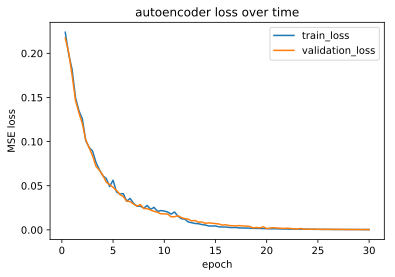

In [43]:
%config InlineBackend.figure_format = 'svg'
fig, ax = plt.subplots()
ax.plot(losses['epoch'], losses['train_loss'])
ax.plot(losses['epoch'], losses['validation_loss'])
ax.set_ylabel('MSE loss')
ax.set_xlabel('epoch')
ax.set_title('autoencoder loss over time')
ax.legend()

In [32]:
encoded = ae.get_encoded_representations()

In [33]:
encoded.shape

(26744, 100)

In [34]:
encoded[:10, :5]

array([[0.05032459, 0.        , 0.        , 0.        , 0.53481305],
       [0.        , 0.        , 0.        , 0.        , 0.46456537],
       [0.        , 0.        , 0.        , 0.        , 0.5692221 ],
       [0.00185815, 0.        , 0.        , 0.        , 0.43467408],
       [0.        , 0.        , 0.        , 0.        , 0.4278627 ],
       [0.2352247 , 0.        , 0.        , 0.        , 0.47872636],
       [0.10936389, 0.        , 0.        , 0.        , 0.52176124],
       [0.04019884, 0.        , 0.        , 0.        , 0.47893742],
       [0.2287716 , 0.        , 0.        , 0.        , 0.44490448],
       [0.        , 0.        , 0.        , 0.        , 0.54743814]],
      dtype=float32)

In [35]:
with open('../data/autoencoder_embeddings.pkl', 'wb') as fh:
    pickle.dump(encoded, fh)